In [2]:
%matplotlib inline
%gui

In [3]:
import chainer
from chainer import serializers
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [18]:
import net, data
import importlib
importlib.reload(net)

<module 'net' from '/Users/quolc/pathology/deep/chainer-examples/caltech101-stacked-cae/net.py'>

In [21]:
model = net.Regression(net.DCAE(227,[(7, 20, 2, 3), (4, 20, 2, 2), (3, 10, 1, 2)],  [300], 'relu'))

[network architecture]
input: 3x227x227
conv0: 20x7x7 (pad2)
 -> 20x225x225
pool0: 3x3
 -> 20x75x75
conv1: 20x4x4 (pad2)
 -> 20x76x76
pool1: 2x2
 -> 20x38x38
conv2: 10x3x3 (pad1)
 -> 10x38x38
pool2: 2x2
 -> 10x19x19
fc0: 3610 -> 300



In [22]:
#serializers.load_npz('./relu_5x8filters_1000hidden_epoch200_noise0.model', model)
serializers.load_npz('./08161738.model', model)

In [23]:
model.predictor.conv0.W.data.shape

(20, 3, 7, 7)

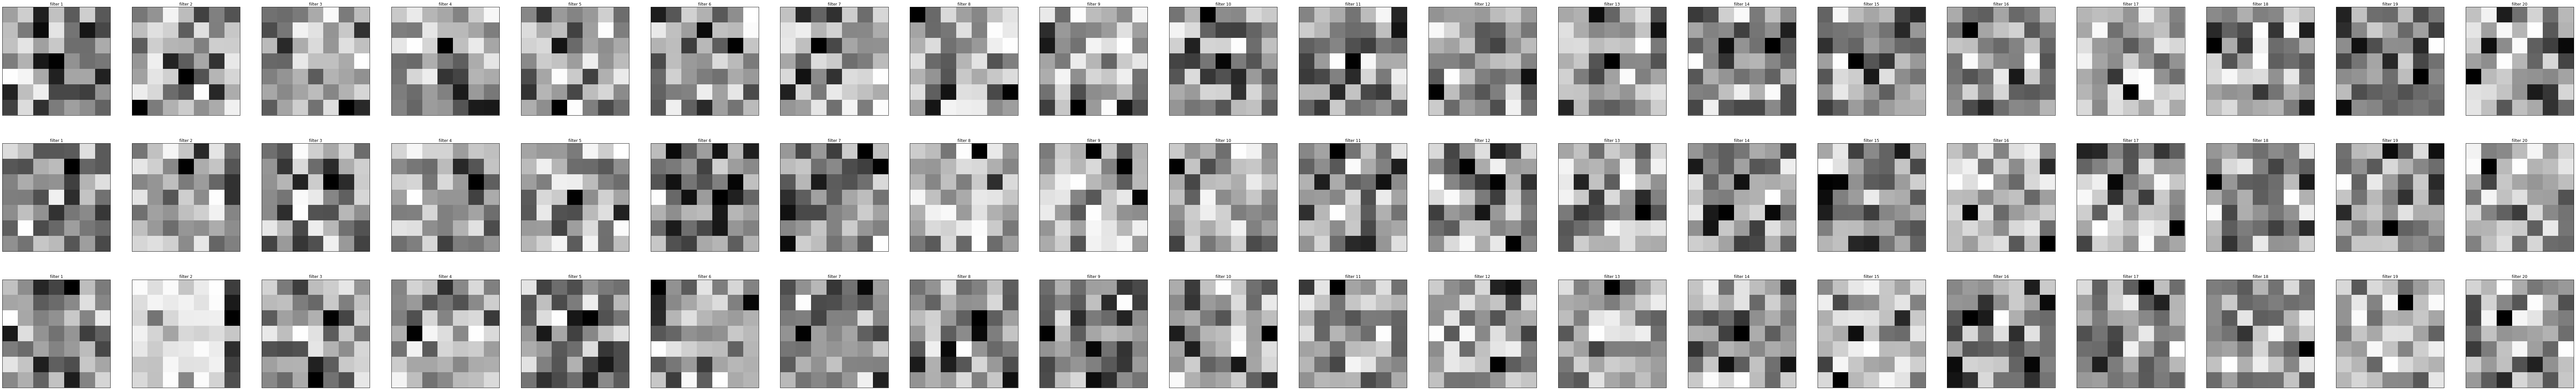

In [26]:
# フィルタの重み可視化
n_filters = model.predictor.conv0.W.data.shape[0]
n_chs = model.predictor.conv0.W.data.shape[1]
filter_size = model.predictor.conv0.W.data.shape[2]
fig, axes = plt.subplots(n_chs, n_filters, figsize=(filter_size*n_filters, filter_size*n_chs))
for ch in range(n_chs):
    for i in range(n_filters):
        f = model.predictor.conv0.W.data[i][ch]
        axes[ch,i].set_xticks([]); axes[ch,i].set_yticks([])
        axes[ch,i].set_title('filter ' + str(i+1))
        axes[ch,i].imshow(f.reshape((filter_size, filter_size)), cmap=cm.Greys_r, interpolation='none')